<font color='blue' size='4'>**Objective**:</font><br><br> To predict the costs of used cars given the data collected from various sources and distributed across various locations in Inida.

<font color='blue' size='4'>**Strategy**</font>
* Analyzing the training and testing data set
* Cleaning the data
* Train the machine to predict the costs of second hand cars using sklearn library in python
* Checking the accuracy of the predicted data
* Creating an excel sheet containing these values 

<font color='blue' size='4'>**Data Cleaning**</font>
* All the rows containing null values are removed
* The rows which contains non-explainable data values are also removed

In [1]:
#importing important libraries (few are imported in between)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#storing the data sets 
df_full = pd.read_excel("Data_Train (2).xlsx")
df_test = pd.read_excel("Data_Test (2).xlsx")

In [3]:
#checking for null values
df_full.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [4]:
Name=[]
model=[]
Version=[]
for i in df_full.Name:
    k=i.split()
    Name.append(k[0])
    model.append(k[1])
    k=' '.join(k[2:])
    #print(k)
    Version.append(k)


In [5]:
df_full['Name'] = df_full.Name.str.split().str.get(0)
df_test['Name'] = df_test.Name.str.split().str.get(0)

In [6]:
df_full=df_full[df_full['Seats'].notna()]
df_test=df_test[df_test['Seats'].notna()]

In [7]:
data = pd.concat([df_full,df_test], sort=False)
data.shape

(7200, 12)

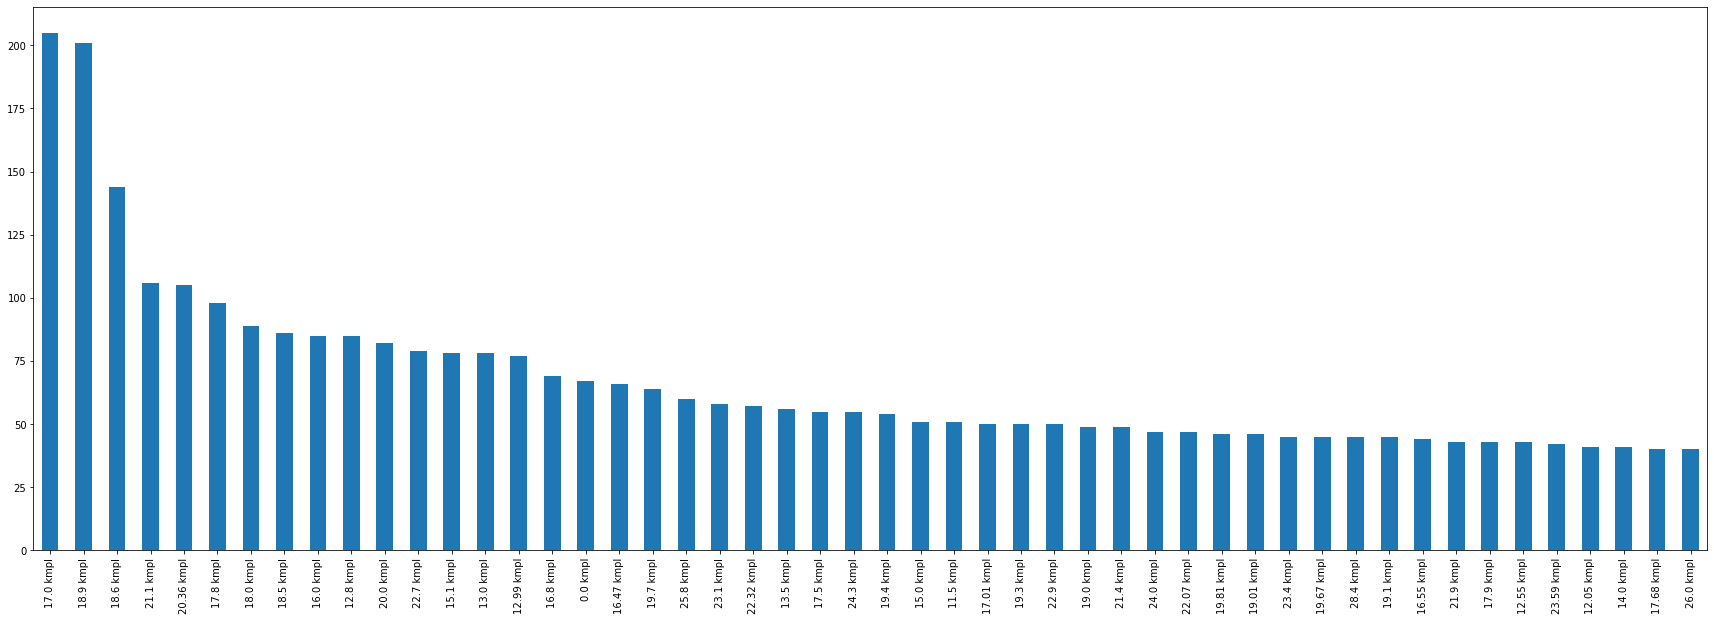

In [8]:
plt.figure(figsize=(30,10))
data['Mileage'].value_counts().head(50).plot.bar()
plt.show()

<font size='4' color='blue'> From the above graph, we can see that the car having a mileage of 17.0 kmpl is the most common type of car</font>

In [9]:

df_full=df_full[df_full['Mileage']!='0.0 kmpl']
df_test=df_test[df_test['Mileage']!='0.0 kmpl']


df_full=df_full[df_full['Mileage'].notna()]
df_test=df_test[df_test['Mileage'].notna()]

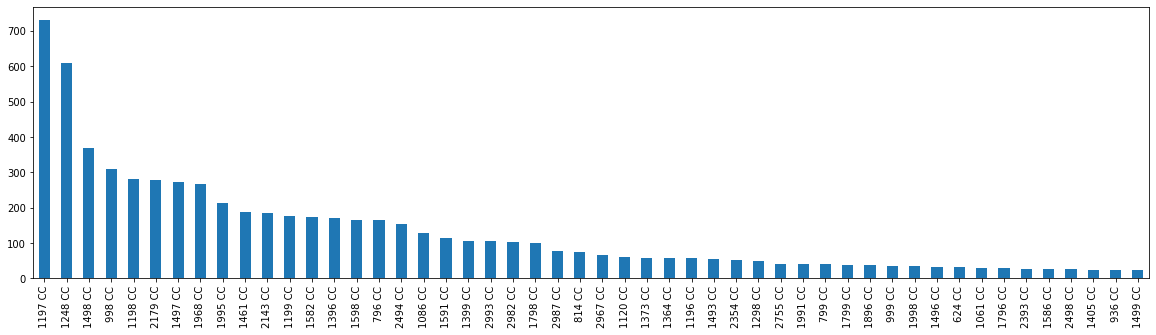

In [10]:
plt.figure(figsize=(20,5))
data['Engine'].value_counts().head(50).plot.bar()
plt.show()

<font size='4' color='blue'> From the above graph, we can see that the car having an engine of 1197cc is the most common type of car</font>

In [11]:
df_full=df_full[df_full['Engine'].notna()]
df_test=df_test[df_test['Engine'].notna()]

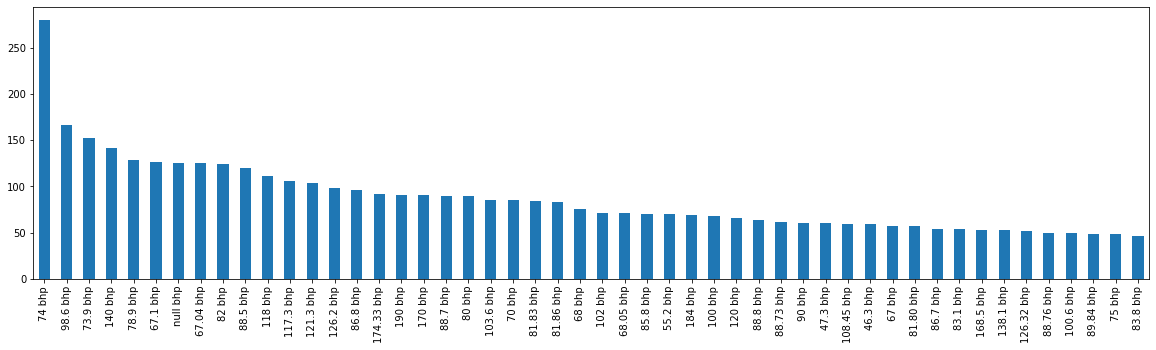

In [12]:
plt.figure(figsize=(20,5))
data['Power'].value_counts().head(50).plot.bar()
plt.show()

<font size='4' color='blue'> From the above graph, we can see that the car having power of 74bhp is the most common type of car</font>

In [13]:
df_full=df_full[df_full['Power'].notna()]
df_test=df_test[df_test['Power'].notna()]

df_full=df_full[df_full['Power']!='null bhp']
df_test=df_test[df_test['Power']!='null bhp']

print(df_full.shape)


(5844, 12)


In [14]:
df_full.Mileage=df_full.Mileage.str.replace("kmpl",'').str.replace('km/kg','')
df_full.Engine=df_full.Engine.str.replace("CC",'')
df_full.Power=df_full.Power.str.replace("bhp",'')

df_test.Mileage=df_test.Mileage.str.replace("kmpl",'').str.replace('km/kg','')
df_test.Engine=df_test.Engine.str.replace("CC",'')
df_test.Power=df_test.Power.str.replace("bhp",'')

In [15]:
df_full['Mileage'] = df_full['Mileage'].astype(float)
df_full['Engine'] = df_full.Engine.astype(int)
df_full['Power'] = df_full['Power'].astype(float)

df_test['Mileage'] = df_test['Mileage'].astype(float)
df_test['Engine'] = df_test.Engine.astype(int)
df_test['Power'] = df_test['Power'].astype(float)

In [16]:
df_full.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [17]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5844 entries, 0 to 6018
Data columns (total 12 columns):
Name                 5844 non-null object
Location             5844 non-null object
Year                 5844 non-null int64
Kilometers_Driven    5844 non-null int64
Fuel_Type            5844 non-null object
Transmission         5844 non-null object
Owner_Type           5844 non-null object
Mileage              5844 non-null float64
Engine               5844 non-null int32
Power                5844 non-null float64
Seats                5844 non-null float64
Price                5844 non-null float64
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 570.7+ KB


In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 0 to 1233
Data columns (total 11 columns):
Name                 1195 non-null object
Location             1195 non-null object
Year                 1195 non-null int64
Kilometers_Driven    1195 non-null int64
Fuel_Type            1195 non-null object
Transmission         1195 non-null object
Owner_Type           1195 non-null object
Mileage              1195 non-null float64
Engine               1195 non-null int32
Power                1195 non-null float64
Seats                1195 non-null float64
dtypes: float64(3), int32(1), int64(2), object(5)
memory usage: 107.4+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_full['Name']=le.fit_transform(df_full['Name'])
df_full['Fuel_Type']=le.fit_transform(df_full['Fuel_Type'])
df_full['Transmission']=le.fit_transform(df_full['Transmission'])
df_full['Owner_Type']=le.fit_transform(df_full['Owner_Type'])
df_full['Year']=le.fit_transform(df_full['Year'])
df_full['Seats']=le.fit_transform(df_full['Seats'])
df_full['Location']=le.fit_transform(df_full['Location'])

df_test['Name']=le.fit_transform(df_test['Name'])
df_test['Fuel_Type']=le.fit_transform(df_test['Fuel_Type'])
df_test['Transmission']=le.fit_transform(df_test['Transmission'])
df_test['Owner_Type']=le.fit_transform(df_test['Owner_Type'])
df_test['Year']=le.fit_transform(df_test['Year'])
df_test['Seats']=le.fit_transform(df_test['Seats'])
df_test['Location']=le.fit_transform(df_test['Location'])


In [20]:
from sklearn.model_selection import train_test_split

y = np.log1p(df_full.Price)
x = df_full.drop(['Price'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9,test_size=0.1,random_state=1)  

In [21]:
df_full.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,18,9,12,72000,0,1,0,26.60,998,58.16,2,1.75
1,10,10,17,41000,1,1,0,19.67,1582,126.20,2,12.50
2,9,2,13,46000,3,1,0,18.20,1199,88.70,2,4.50
3,18,2,14,87000,1,1,0,20.77,1248,88.76,4,6.00
4,1,3,15,40670,1,0,2,15.20,1968,140.80,2,17.74


In [22]:
x_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
1012,27,2,19,67489,1,1,0,13.68,2393,147.80,4
5358,9,5,18,29512,3,1,0,17.40,1497,117.30,2
4408,18,9,12,12000,3,1,0,22.50,998,67.04,2
3293,27,10,12,140000,1,1,3,12.80,2494,102.00,4
5244,10,2,16,41681,3,1,0,17.00,1197,80.00,2


In [23]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5259 entries, 1012 to 5314
Data columns (total 11 columns):
Name                 5259 non-null int32
Location             5259 non-null int32
Year                 5259 non-null int64
Kilometers_Driven    5259 non-null int64
Fuel_Type            5259 non-null int32
Transmission         5259 non-null int32
Owner_Type           5259 non-null int32
Mileage              5259 non-null float64
Engine               5259 non-null int32
Power                5259 non-null float64
Seats                5259 non-null int64
dtypes: float64(2), int32(6), int64(3)
memory usage: 369.8 KB


In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rf.fit(x_train,y_train);
pred_y=rf.predict(x_test)
errors=abs(pred_y-y_test)
#print('MAE: ',round(np.mean(errors),10))

In [25]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y_test,pred_y))
print("MSE: ", metrics.mean_squared_error(y_test,pred_y))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,pred_y)))

MAE:  0.11285444516009788
MSE:  0.02510036554200328
RMSE:  0.15843094881368122


In [26]:
#predicting the cost
preds_test = rf.predict(df_test)
print(preds_test)
preds_test = np.exp(preds_test)-1
print(preds_test)
preds_test = preds_test.round(2)
print(preds_test)

[1.00766804 1.23334627 2.59840367 ... 1.13479102 1.37707703 2.399863  ]
[ 1.73920585  2.43269707 12.44226257 ...  2.11052344  2.96330009
 10.02166636]
[ 1.74  2.43 12.44 ...  2.11  2.96 10.02]


In [27]:
# Calculating the mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculating and displaying accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.82 %.


In [28]:
output = pd.DataFrame({'Price': preds_test})
output.to_excel('submission.xlsx', index=False)

<font size='4' color='Blue'>Thus we can see that we have obtained an accuracy of 93.82%.<br>The predicted values can be seen inside of the excel sheet 'submission.xlsx'